## Spherical Harmonics

Spherical harmonics are mathematical functions described by associated Legendre polynomials. In Legendre polynomials, polar coordinates are used in place of cartesian coordinates (See Appendix A). Spherical harmonics describe the shape of the atomic orbital. Below is the Legendre polynomial for the spherical harmonics:

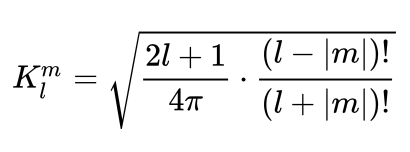

This is difficult to work with. Helpfully, scipy (a scientific python library) includes a function to generate spherical harmonics, where l and m are quantum numbers and theta and phi are angles from the polar coordinate system:

sph_harm(m, l, theta, phi)

The full code I wrote for generating spherical harmonics is below, as well as my generated plots

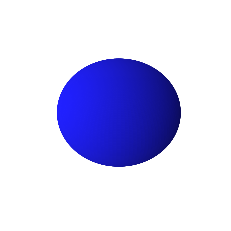

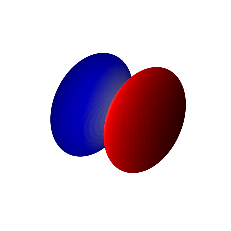

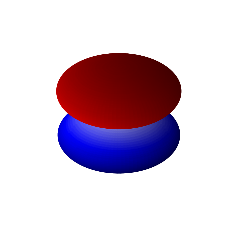

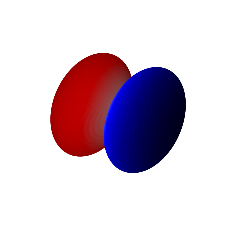

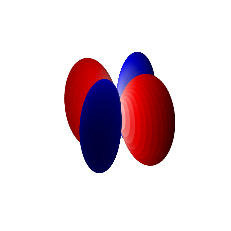

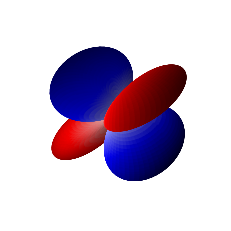

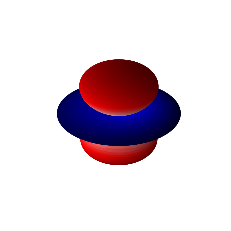

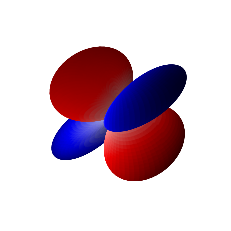

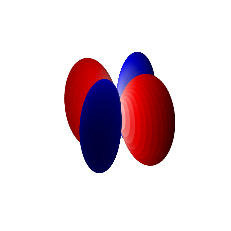

In [1]:
# Spherical Harmonics
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

# Create mesh grid of theta and phi values
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Receive quantum numbers
#l = int(input('Angular Momentum Quantum number: \n'))
#m = int(input('Magnetic quantum number: \n'))
l = 0
m = 0

for l in  range ( 0,3 ):
    for m in  range (-l,l+1):
        # Calculate the spherical harmonic and normalize to [0,1]
        harmonic = abs(sph_harm(m, l, theta, phi).real)
        colour = sph_harm(m, l, theta, phi).real

        # Plot a sphere for s orbitals
        if l == 0:
            harmonic = 1

        # Calculate cartesian coordinates
        x = harmonic*np.sin(phi) * np.cos(theta)
        y = harmonic*np.sin(phi) * np.sin(theta)
        z = harmonic*np.cos(phi)
        
        # Colour function
        fmax = colour.max()
        fmin = colour.min()
        if l != 0:
            colour = (colour - fmin)/(fmax - fmin)

        # Set the aspect ratio to 1 
        fig = plt.figure(figsize=plt.figaspect(1.))
        ax = fig.add_subplot(1,1,1, projection='3d')
        ax.set_axis_off()
        ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(colour))

# Turn off the axis planes
plt.show()
